In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import os
from sklearn.preprocessing import OneHotEncoder
import PIL
from PIL import Image, ImageOps
from numpy import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

/Users/zes3/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# input image dimensions
img_rows, img_cols = 200, 200

# number of channels
img_channels = 3

#  data
path1 = '/Users/zes3/Documents/BaumbilderBA'    #path of folder of images    
path2 = '/Users/zes3/Documents/Bachelor_Thesis/BaumbilderBA_farbig_resized'  #path of folder to save images    

listing = os.listdir(path1)
num_folders=size(listing)

In [62]:
for folder in listing:
    if folder == '.DS_Store':
        continue
    for root, dirs, files in os.walk(path1 + "/" + folder):
        herkunftsort = os.path.basename(os.path.dirname(root))
        print(herkunftsort)
        if root == '.DS_Store':
            continue
        for file in files:
            #print(file)
            if file == '.DS_Store':
                continue
            path = os.path.join(root,file)
            im = Image.open(path)   
            img = PIL.ImageOps.fit(im, (img_rows, img_cols), method=0, bleed=0.0, centering=(0.5, 0.5))
            #img = im.resize((img_rows,img_cols))
            #need to do some more processing here
            img.save(path2 +'/' +  herkunftsort + '_' + file, "JPEG")

BaumbilderBA
Biel_Vorstadt
BaumbilderBA
Isenfluh
Isenfluh
Isenfluh
Isenfluh
Isenfluh
BaumbilderBA
Biel
Biel
Biel
Biel
Biel
Biel
Biel
BaumbilderBA
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
Alle_alten_Bern
BaumbilderBA
Schosshalden
Schosshalden
Schosshalden
Schosshalden
BaumbilderBA
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
Sumiswald
BaumbilderBA
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
Allmend_Schosshalden
BaumbilderBA
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
Wyssenau_Isenfluh
BaumbilderBA
Paul_Klee
Paul_Klee
Paul_Klee
BaumbilderBA
Wa

In [16]:
imlist = os.listdir(path2)

if '.DS_Store' in imlist:
    imlist.remove('.DS_Store')

# open one image to get size
im1 = array(Image.open('BaumbilderBA_farbig_resized/'+ imlist[0])) 
m,n = im1.shape[0:2]

imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open('BaumbilderBA_farbig_resized'+ '/' + im2)).flatten()
              for im2 in imlist],'f')
num_samples = imnbr
print(num_samples)
print(immatrix.shape)

7684
(7684, 120000)


In [17]:
label=np.ones((num_samples,),dtype = int)

i=0
while i < len(imlist):
    fileName = imlist[i]
    #print(str(i) + "->" + fileName)
    if "Bergahorn" in fileName:
        label[i] = 0
        #print("Bergahorn")
    if "Spitzahorn" in fileName:
        label[i] = 1
        #print("Spitzahorn")
    if "Feldahorn" in fileName:
        label[i] = 2
        #print("Feldahorn")
    if "Buche" in fileName:
        label[i] = 3
        #print("Buche")
    if "Birke" in fileName:
        label[i] = 4
        #print("Birke")
    if "Eiche" in fileName:
        label[i] = 5
        #print("Eiche")
    if "Stechpalme" in fileName:
        label[i] = 6
        #print("Stechpalme")
    if "Ulme" in fileName:
        label[i] = 7
        #print("Ulme")
    if "Linde" in fileName:
        label[i] = 8
        #print("Linde")
    if "Kirsche" in fileName:
        label[i] = 9
        #print("Kirsche")
    if "Esche" in fileName:
        label[i] = 10
        #print("Esche")
    print(str(i) + "->" + imlist[i])
    print(label[i])
    i += 1

0->Boenigen_Linde8_1011.png
8
1->Schosshalden_Vogelbeere1_2226.png
1
2->Boenigen_Linde6_206.png
8
3->Paul_Klee_Birke1_291.png
4
4->Sumiswald_Spitzahorn1_1141.png
1
5->Pferdezentrum_Birke2_1501.png
4
6->Alle_alten_Bern_Eiche6_431.png
5
7->Alle_alten_Bern_Buche2_661.png
3
8->Isenfluh_Esche7_456.png
10
9->Schosshalden_Feldahorn5_1161.png
2
10->Wyssenau_Isenfluh_Zitterpappel2_111.png
1
11->Alle_alten_Bern_Eiche5_41.png
5
12->Waldrand_Spitzahorn5_546.png
1
13->Sumiswald_Esche2_2281.png
10
14->Boenigen_Esche6_811.png
10
15->Boenigen_Bergahorn7_281.png
0
16->Wyssenau_Isenfluh_Esche1_366.png
10
17->Alle_alten_Bern_Eiche5_96.png
5
18->Biel_Birke4_541.png
4
19->Allmend_Schosshalden_Hasle1_1426.png
1
20->Sumiswald_Esche2_1011.png
10
21->Pferdezentrum_Birke4_1941.png
4
22->Boenigen_Linde7_1391.png
8
23->Allmend_Schosshalden_Birke1_3586.png
4
24->Schosshalden_Stechpalme8_871.png
6
25->Alle_alten_Bern_Buche4_156.png
3
26->Schosshalden_Stechpalme4_2536.png
6
27->Wyssenau_Isenfluh_Vogelbeere1_1216.png

991->Boenigen_Ulme5_1311.png
7
992->Isenfluh_Esche8_61.png
10
993->Boenigen_Birke3_651.png
4
994->Paul_Klee_Feldahorn3_1431.png
2
995->Pferdezentrum_Birke2_971.png
4
996->Sumiswald_Feldahorn1_2216.png
2
997->Waldrand_Spitzahorn5_636.png
1
998->Alle_alten_Bern_Stechpalme3_301.png
6
999->Boenigen_Esche6_1881.png
10
1000->Alle_alten_Bern_Buche7_326.png
3
1001->Boenigen_Weide3_1626.png
1
1002->Alle_alten_Bern_Buche2_511.png
3
1003->Waldrand_Bergahorn1_421.png
0
1004->Allmend_Schosshalden_Linde3_1366.png
8
1005->Alle_alten_Bern_Buche6_121.png
3
1006->Boenigen_Kirsche2_496.png
9
1007->Alle_alten_Bern_Stechpalme2_106.png
6
1008->Biel_Eiche1_96.png
5
1009->Biel_Kirsche1_1751.png
9
1010->Allmend_Schosshalden_Ulme1_451.png
7
1011->Wyssenau_Isenfluh_Weide2_216.png
1
1012->Wyssenau_Isenfluh_Vogelbeere1_776.png
1
1013->Boenigen_Esche4_866.png
10
1014->Wyssenau_Isenfluh_Esche2_116.png
10
1015->Boenigen_Esche4_1.png
10
1016->Allmend_Schosshalden_Schwarzpappel2_3306.png
1
1017->Alle_alten_Bern_Ulme3_4

1741->Boenigen_Vogelbeere1_326.png
1
1742->Alle_alten_Bern_Hasle2_26.png
1
1743->Biel_Vorstadt_Linde2_296.png
8
1744->Allmend_Schosshalden_Feldahorn3_576.png
2
1745->Boenigen_Kirsche6_846.png
9
1746->Alle_alten_Bern_Ulme1_101.png
7
1747->Alle_alten_Bern_Stechpalme3_26.png
6
1748->Waldrand_Esche2_451.png
10
1749->Boenigen_Linde8_876.png
8
1750->Boenigen_Vogelbeere1_1561.png
1
1751->Alle_alten_Bern_Eiche3_996.png
5
1752->Sumiswald_Nussbaum1_3061.png
1
1753->Biel_Kirsche1_1196.png
9
1754->Sumiswald_Nussbaum1_1676.png
1
1755->Biel_Kirsche1_3781.png
9
1756->Isenfluh_Esche7_491.png
10
1757->Alle_alten_Bern_Eiche5_86.png
5
1758->Pferdezentrum_Birke4_1951.png
4
1759->Isenfluh_Esche8_776.png
10
1760->Alle_alten_Bern_Buche5_341.png
3
1761->Biel_Kirsche1_2676.png
9
1762->Boenigen_Weide3_1591.png
1
1763->Alle_alten_Bern_Buche6_296.png
3
1764->Alle_alten_Bern_Buche4_146.png
3
1765->Boenigen_Kirsche7_116.png
9
1766->Waldrand_Bergahorn6_271.png
0
1767->Waldrand_Spitzahorn3_1041.png
1
1768->Pferdezent

1
2491->Allmend_Schosshalden_Ulme1_351.png
7
2492->Biel_Birke4_31.png
4
2493->Boenigen_Birke2_381.png
4
2494->Alle_alten_Bern_Stechpalme2_821.png
6
2495->Biel_Kirsche1_606.png
9
2496->Allmend_Schosshalden_Buche2_1236.png
3
2497->Waldrand_Spitzahorn4_1646.png
1
2498->Alle_alten_Bern_Ulme2_111.png
7
2499->Alle_alten_Bern_Ulme2_46.png
7
2500->Alle_alten_Bern_Stechpalme2_376.png
6
2501->Alle_alten_Bern_Stechpalme3_171.png
6
2502->Boenigen_Bergahorn3_6.png
0
2503->Isenfluh_Esche2_361.png
10
2504->Schosshalden_Stechpalme8_6.png
6
2505->Alle_alten_Bern_Eiche3_306.png
5
2506->Biel_Kirsche2_3371.png
9
2507->Schosshalden_Stechpalme8_1561.png
6
2508->Wyssenau_Isenfluh_Ulme4_1101.png
7
2509->Alle_alten_Bern_Buche2_761.png
3
2510->Biel_Kirsche2_1566.png
9
2511->Alle_alten_Bern_Buche7_156.png
3
2512->Pferdezentrum_Birke4_1666.png
4
2513->Alle_alten_Bern_Spitzahorn3_176.png
1
2514->Schosshalden_Stechpalme3_76.png
6
2515->Allmend_Schosshalden_Schwarzpappel1_2561.png
1
2516->Allmend_Schosshalden_Feldah

1
3241->Alle_alten_Bern_Ulme1_411.png
7
3242->Pferdezentrum_Birke4_1066.png
4
3243->Waldrand_Bergahorn7_941.png
0
3244->Pferdezentrum_Birke4_3671.png
4
3245->Wyssenau_Isenfluh_Erle4_1966.png
1
3246->Alle_alten_Bern_Ulme1_361.png
7
3247->Sumiswald_Nussbaum1_1416.png
1
3248->Paul_Klee_Linde2_556.png
8
3249->Schosshalden_Feldahorn3_1406.png
2
3250->Allmend_Schosshalden_Schwarzpappel2_381.png
1
3251->Schosshalden_Nussbaum1_1766.png
1
3252->Alle_alten_Bern_Eiche3_1046.png
5
3253->Isenfluh_Esche8_1106.png
10
3254->Biel_Bergahorn1_706.png
0
3255->Wyssenau_Isenfluh_Zitterpappel3_416.png
1
3256->Paul_Klee_Birke1_591.png
4
3257->Isenfluh_Esche3_766.png
10
3258->Alle_alten_Bern_Stechpalme4_296.png
6
3259->Sumiswald_Esche2_631.png
10
3260->Wyssenau_Isenfluh_Ulme1_1.png
7
3261->Alle_alten_Bern_Buche2_161.png
3
3262->Boenigen_Esche7_76.png
10
3263->Alle_alten_Bern_Ulme2_261.png
7
3264->Allmend_Schosshalden_Eiche3_116.png
5
3265->Paul_Klee_Birke1_1231.png
4
3266->Alle_alten_Bern_Bergahorn3_66.png
0
3

3990->Schosshalden_Feldahorn9_2101.png
2
3991->Alle_alten_Bern_Buche2_781.png
3
3992->Biel_Kirsche1_2751.png
9
3993->Alle_alten_Bern_Buche8_11.png
3
3994->Waldrand_Bergahorn11_496.png
0
3995->Pferdezentrum_Birke4_1876.png
4
3996->Waldrand_Spitzahorn2_141.png
1
3997->Biel_Bergahorn1_1271.png
0
3998->Schosshalden_Feldahorn5_1081.png
2
3999->Alle_alten_Bern_Platane1_136.png
1
4000->Alle_alten_Bern_Stechpalme3_191.png
6
4001->Alle_alten_Bern_Stechpalme1_241.png
6
4002->Boenigen_Nussbaum6_726.png
1
4003->Paul_Klee_Feldahorn2_746.png
2
4004->Wyssenau_Isenfluh_Weide4_766.png
1
4005->Isenfluh_Ulme1_1311.png
7
4006->Alle_alten_Bern_Spitzahorn7_571.png
1
4007->Alle_alten_Bern_Ulme1_556.png
7
4008->Pferdezentrum_Birke4_3046.png
4
4009->Boenigen_Kirsche8_51.png
9
4010->Paul_Klee_Linde3_166.png
8
4011->Alle_alten_Bern_Buche12_196.png
3
4012->Waldrand_Spitzahorn2_196.png
1
4013->Waldrand_Spitzahorn5_2191.png
1
4014->Paul_Klee_Feldahorn2_791.png
2
4015->Paul_Klee_Birke2_271.png
4
4016->Alle_alten_Ber

4740->Isenfluh_Esche5_701.png
10
4741->Isenfluh_Esche8_736.png
10
4742->Alle_alten_Bern_Eiche3_281.png
5
4743->Boenigen_Linde14_466.png
8
4744->Waldrand_Bergahorn6_231.png
0
4745->Allmend_Schosshalden_Hasle2_761.png
1
4746->Pferdezentrum_Birke2_1586.png
4
4747->Alle_alten_Bern_Ulme3_36.png
7
4748->Alle_alten_Bern_Bergahorn5_331.png
0
4749->Boenigen_Linde6_281.png
8
4750->Allmend_Schosshalden_Birke1_71.png
4
4751->Alle_alten_Bern_Bergahorn4_71.png
0
4752->Alle_alten_Bern_Buche9_131.png
3
4753->Biel_Kirsche5_56.png
9
4754->Alle_alten_Bern_Buche11_456.png
3
4755->Schosshalden_Nussbaum1_1546.png
1
4756->Allmend_Schosshalden_Linde1_411.png
8
4757->Alle_alten_Bern_Spitzahorn3_556.png
1
4758->Alle_alten_Bern_Stechpalme3_66.png
6
4759->Alle_alten_Bern_Ulme1_141.png
7
4760->Alle_alten_Bern_Ulme3_291.png
7
4761->Allmend_Schosshalden_Birke1_1896.png
4
4762->Allmend_Schosshalden_Feldahorn3_536.png
2
4763->Biel_Kirsche2_656.png
9
4764->Schosshalden_Stechpalme1_771.png
6
4765->Alle_alten_Bern_Buche9

3
5555->Alle_alten_Bern_Bergahorn4_256.png
0
5556->Boenigen_Esche3_331.png
10
5557->Boenigen_Nussbaum6_521.png
1
5558->Alle_alten_Bern_Platane1_331.png
1
5559->Boenigen_Linde18_536.png
8
5560->Schosshalden_Stechpalme4_971.png
6
5561->Alle_alten_Bern_Buche12_346.png
3
5562->Sumiswald_Nussbaum1_326.png
1
5563->Alle_alten_Bern_Spitzahorn8_1.png
1
5564->Wyssenau_Isenfluh_Linde1_466.png
8
5565->Alle_alten_Bern_Spitzahorn3_391.png
1
5566->Alle_alten_Bern_Ulme3_456.png
7
5567->Biel_Vorstadt_Linde7_226.png
8
5568->Allmend_Schosshalden_Eiche2_1021.png
5
5569->Schosshalden_Vogelbeere1_1386.png
1
5570->Biel_Vorstadt_Linde3_1541.png
8
5571->Wyssenau_Isenfluh_Nussbaum2_516.png
1
5572->Schosshalden_Stechpalme7_656.png
6
5573->Wyssenau_Isenfluh_Erle4_591.png
1
5574->Alle_alten_Bern_Feldahorn1_61.png
2
5575->Pferdezentrum_Linde1_706.png
8
5576->Alle_alten_Bern_Bergahorn4_281.png
0
5577->Paul_Klee_Feldahorn1_96.png
2
5578->Wyssenau_Isenfluh_Zitterpappel2_221.png
1
5579->Schosshalden_Stechpalme11_596.pn

10
6240->Biel_Ulme1_1041.png
7
6241->Boenigen_Linde10_756.png
8
6242->Boenigen_Linde16_1091.png
8
6243->Alle_alten_Bern_Eiche3_581.png
5
6244->Boenigen_Linde12_1.png
8
6245->Wyssenau_Isenfluh_Zitterpappel2_696.png
1
6246->Alle_alten_Bern_Stechpalme4_211.png
6
6247->Boenigen_Nussbaum3_776.png
1
6248->Wyssenau_Isenfluh_Kirsche1_141.png
9
6249->Allmend_Schosshalden_Schwarzpappel2_2376.png
1
6250->Alle_alten_Bern_Buche3_51.png
3
6251->Paul_Klee_Feldahorn3_326.png
2
6252->Isenfluh_Kirsche1_2371.png
9
6253->Biel_Bergahorn1_781.png
0
6254->Boenigen_Weide2_656.png
1
6255->Alle_alten_Bern_Eiche5_261.png
5
6256->Isenfluh_Esche8_1181.png
10
6257->Biel_Vorstadt_Linde3_2366.png
8
6258->Wyssenau_Isenfluh_Linde3_81.png
8
6259->Alle_alten_Bern_Ulme2_231.png
7
6260->Allmend_Schosshalden_Birke3_1451.png
4
6261->Boenigen_Bergahorn7_506.png
0
6262->Wyssenau_Isenfluh_Zitterpappel4_1311.png
1
6263->Pferdezentrum_Birke4_496.png
4
6264->Schosshalden_Vogelbeere1_736.png
1
6265->Pferdezentrum_Birke2_376.png
4
6

6989->Wyssenau_Isenfluh_Erle2_946.png
1
6990->Allmend_Schosshalden_Birke1_5066.png
4
6991->Biel_Esche1_1.png
10
6992->Sumiswald_Bergahorn5_61.png
0
6993->Alle_alten_Bern_Buche8_591.png
3
6994->Alle_alten_Bern_Ulme1_86.png
7
6995->Paul_Klee_Feldahorn1_151.png
2
6996->Alle_alten_Bern_Buche3_246.png
3
6997->Boenigen_Zitterpappel2_1131.png
1
6998->Allmend_Schosshalden_Buche1_1021.png
3
6999->Allmend_Schosshalden_Eiche4_506.png
5
7000->Schosshalden_Nussbaum1_1646.png
1
7001->Isenfluh_Spitzahorn1_1246.png
1
7002->Pferdezentrum_Birke4_531.png
4
7003->Wyssenau_Isenfluh_Esche7_6.png
10
7004->Biel_Kirsche6_166.png
9
7005->Wyssenau_Isenfluh_Esche5_176.png
10
7006->Wyssenau_Isenfluh_Esche2_491.png
10
7007->Schosshalden_Stechpalme4_246.png
6
7008->Biel_Kirsche2_2001.png
9
7009->Waldrand_Bergahorn5_1256.png
0
7010->Pferdezentrum_Birke4_1146.png
4
7011->Sumiswald_Nussbaum1_2981.png
1
7012->Alle_alten_Bern_Ulme3_191.png
7
7013->Alle_alten_Bern_Ulme1_241.png
7
7014->Waldrand_Feldahorn1_696.png
2
7015->

In [18]:
#The method shuffle() randomizes the items of a list in place.
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

print(immatrix[7683].shape)
#img=immatrix[7683].reshape(img_rows,img_cols)

#plt.imshow(img)
#plt.imshow(img,cmap='gray')
#plt.show()
print (train_data[0].shape)
print (train_data[1].shape)

(120000,)
(7684, 120000)
(7684,)


X_train shape: (6147, 200, 200, 3)
6147 train samples
1537 test samples


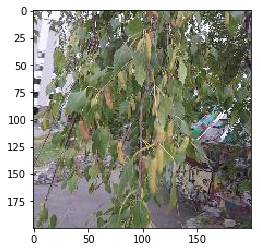

In [21]:
batch_size = 128
num_classes = 11
epochs = 25

(X, y) = (train_data[0],train_data[1])

# STEP 1: split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#TODO was bedeutet der letzte parameter?????????
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

img=X_train[0]

plt.imshow(img)
plt.show()

In [22]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 6147 samples, validate on 1537 samples
Epoch 1/25
6147/6147 [==============================] - 10390s 2s/step - loss: 2.9418 - acc: 0.1967 - val_loss: 2.6111 - val_acc: 0.2180
Epoch 2/25
6147/6147 [==============================] - 10044s 2s/step - loss: 2.2342 - acc: 0.2312 - val_loss: 3.5360 - val_acc: 0.2180
Epoch 3/25
6147/6147 [==============================] - 10047s 2s/step - loss: 2.1422 - acc: 0.2580 - val_loss: 2.7123 - val_acc: 0.2180
Epoch 4/25
6147/6147 [==============================] - 10019s 2s/step - loss: 2.0429 - acc: 0.2935 - val_loss: 2.1052 - val_acc: 0.2980
Epoch 5/25
5120/6147 [=======================>......] - ETA: 25:44 - loss: 1.9339 - acc: 0.3266

KeyboardInterrupt: 